In [40]:
#!/usr/bin/env python 
# -*- coding:utf-8 -*-
%matplotlib inline
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix 
from sklearn .pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit 

In [12]:
data = pd.read_csv('D:/statistics/machine learning in action/GiveMeSomeCredit/data.csv')
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145344 entries, 0 to 145343
Data columns (total 11 columns):
SeriousDlqin2yrs                        145344 non-null int64
age                                     145344 non-null int64
NumberOfDependents                      145344 non-null float64
MonthlyIncome                           145344 non-null float64
DebtRatio                               145344 non-null float64
RevolvingUtilizationOfUnsecuredLines    145344 non-null float64
NumberOfOpenCreditLinesAndLoans         145344 non-null int64
NumberRealEstateLoansOrLines            145344 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    145344 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    145344 non-null int64
NumberOfTimes90DaysLate                 145344 non-null int64
dtypes: float64(4), int64(7)
memory usage: 12.2 MB
None
       SeriousDlqin2yrs            age  NumberOfDependents  MonthlyIncome  \
count     145344.000000  145344.000000       145344.000000   1.453

# 特征工程

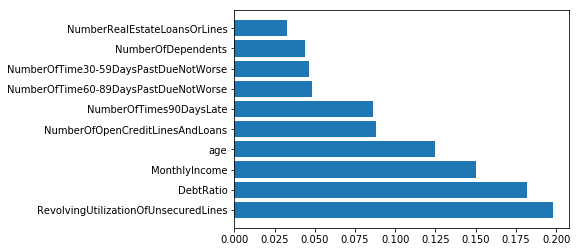

In [3]:
y=data.ix[:,0]
x=data.ix[:,1:]
grd = RandomForestClassifier(n_estimators=30)
grd.fit(x,y)
order = [ 'age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines',
         'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',
         'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
feature_important = pd.Series(grd.feature_importances_, index = order ).sort_values(ascending=False)
plt.barh(feature_important.index, feature_important.data)
plt.show()

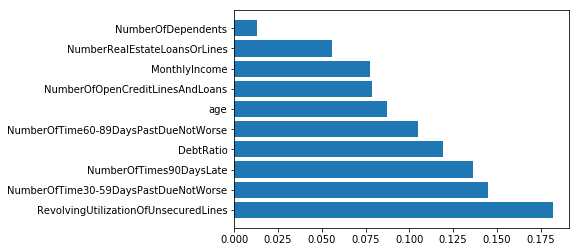

In [ ]:
grd = XGBClassifier()
grd.fit(x,y)
order = [ 'age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines',
         'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',
         'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']
feature_important = pd.Series(grd.feature_importances_, index = order ).sort_values(ascending=False)
plt.barh(feature_important.index, feature_important.data)
plt.show()

In [3]:
del data['NumberOfDependents']
data['numberofloan']=data['NumberOfOpenCreditLinesAndLoans']+data['NumberRealEstateLoansOrLines']
del data['NumberOfOpenCreditLinesAndLoans']
del data['NumberRealEstateLoansOrLines']
print(data.info())
y=data.ix[:,0]
x=data.ix[:,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145344 entries, 0 to 145343
Data columns (total 9 columns):
SeriousDlqin2yrs                        145344 non-null int64
age                                     145344 non-null int64
MonthlyIncome                           145344 non-null float64
DebtRatio                               145344 non-null float64
RevolvingUtilizationOfUnsecuredLines    145344 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    145344 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    145344 non-null int64
NumberOfTimes90DaysLate                 145344 non-null int64
numberofloan                            145344 non-null int64
dtypes: float64(3), int64(6)
memory usage: 10.0 MB
None


# 训练模型
## 构建训练集和测试集

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小


训练集大小： (101740, 8) (101740,)
测试集大小： (43604, 8) (43604,)


## SVM 

In [24]:
svm_clf=Pipeline((
                 ("scaler",StandardScaler()),
                 ("linear_svc",svm.LinearSVC(C=0.1,loss="hinge")),
                 ))

svm_clf.fit(X_train, y_train)
y_train_pred_svm= svm_clf.predict(X_train)
C1=confusion_matrix(y_train,y_train_pred_svm)
print(C1)
print(metrics.classification_report(y_train,y_train_pred_svm))

y_train_crospred_svm=cross_val_predict(svm_clf,X_train,y_train,cv=3)
C2=confusion_matrix(y_train,y_train_crospred_svm)
print(C2)
print(metrics.classification_report(y_train,y_train_crospred_svm))

y_test_pred_svm = svm_clf1.predict(X_test)
C3=confusion_matrix(y_test,y_test_pred_svm)
print(C3)
print(metrics.classification_report(y_test,y_test_pred_svm))


[[94949     0]
 [ 6791     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     94949
           1       0.00      0.00      0.00      6791

   micro avg       0.93      0.93      0.93    101740
   macro avg       0.47      0.50      0.48    101740
weighted avg       0.87      0.93      0.90    101740

[[94949     0]
 [ 6791     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     94949
           1       0.00      0.00      0.00      6791

   micro avg       0.93      0.93      0.93    101740
   macro avg       0.47      0.50      0.48    101740
weighted avg       0.87      0.93      0.90    101740

[[34860  5830]
 [ 1022  1892]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     40690
           1       0.25      0.65      0.36      2914

   micro avg       0.84      0.84      0.84     43604
   macro avg       0.61      0.75  

In [ ]:
clf2=Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",svm.SVC(kernel='poly', degree=3,coef0=1,C=5))
     ))
clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
y2 = clf1.predict(X_train)
print(metrics.classification_report(y_train,y2))
yt2 = clf2.predict(X_test)
print(metrics.classification_report(y_test,yt2))

## 决策树

In [5]:
#CART树
clf=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                           min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, 
                           max_features=None, random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf.fit(X_train, y_train)
y1 = clf.predict(X_train)
C1=confusion_matrix(y_train,y1)
print(C1)
print(metrics.classification_report(y_train,y1))

yt1 = clf.predict(X_test)
C2=confusion_matrix(y_test,yt1)
print(C2)
print(metrics.classification_report(y_test,yt1))


[[94948     1]
 [   20  6771]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94949
           1       1.00      1.00      1.00      6791

   micro avg       1.00      1.00      1.00    101740
   macro avg       1.00      1.00      1.00    101740
weighted avg       1.00      1.00      1.00    101740

[[38272  2418]
 [ 2073   841]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     40690
           1       0.26      0.29      0.27      2914

   micro avg       0.90      0.90      0.90     43604
   macro avg       0.60      0.61      0.61     43604
weighted avg       0.90      0.90      0.90     43604



## 样本不平衡性问题

<class 'pandas.core.series.Series'>


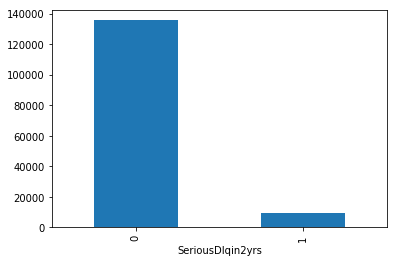

In [22]:
print(type(y))
k=y.groupby(y).count()
k.plot.bar()
plt.show()

### 过采样

In [5]:
from sklearn.datasets import make_classification
from collections import Counter

print(Counter(y_train))


from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=0)
x_trainup, y_trainup = ros.fit_sample(X_train,y_train)
sorted(Counter(y_trainup).items())


Counter({0: 94949, 1: 6791})


[(0, 94949), (1, 94949)]

### 下采样

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_sample(x, y)
sorted(Counter(y_resampled).items())

[(0, 9705), (1, 9705)]

## 朴素贝叶斯

In [42]:
mnb=MultinomialNB()
param_grid=[{'alpha':[0.1,1,10]}]
grid=GridSearchCV(mnb,param_grid,cv=3,scoring='accuracy')
grid.fit(x_trainup,y_trainup)

print(grid.best_params_)

{'alpha': 0.1}


[[49956 44993]
 [25002 69947]]
              precision    recall  f1-score   support

           0       0.67      0.53      0.59     94949
           1       0.61      0.74      0.67     94949

   micro avg       0.63      0.63      0.63    189898
   macro avg       0.64      0.63      0.63    189898
weighted avg       0.64      0.63      0.63    189898

[[21544 19146]
 [  771  2143]]
              precision    recall  f1-score   support

           0       0.97      0.53      0.68     40690
           1       0.10      0.74      0.18      2914

   micro avg       0.54      0.54      0.54     43604
   macro avg       0.53      0.63      0.43     43604
weighted avg       0.91      0.54      0.65     43604

0.7218032859056364


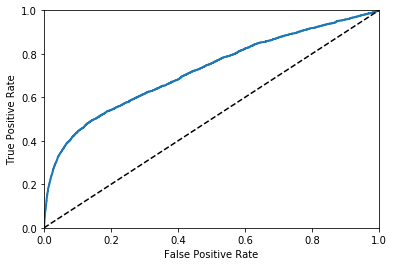

In [45]:
clf_mnb_best=MultinomialNB(alpha=0.1)
clf_mnb_best.fit(x_trainup, y_trainup)
y_trainup_pred_mnb= clf_mnb_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_mnb)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_mnb))

y_test_pred_mnb = clf_mnb_best.predict(X_test)
C3=confusion_matrix(y_test,y_test_pred_mnb)
print(C3)
print(metrics.classification_report(y_test,y_test_pred_mnb))

y_scores=clf_mnb_best.predict_proba(X_test)[:,1]
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

## LR 

In [37]:
clf_lr=Pipeline((
                 ("scaler",StandardScaler()),
                 ("lr",LogisticRegression()),
                 ))
param_grid=[{'lr__C':[1,10,20,30]}]
grid_search=GridSearchCV(clf_lr,param_grid,cv=3,scoring='accuracy')
grid_search.fit(x_trainup,y_trainup)

print(grid_search.best_params_)

{'lr__C': 10}


[[81860 13089]
 [35553 59396]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     94949
           1       0.82      0.63      0.71     94949

   micro avg       0.74      0.74      0.74    189898
   macro avg       0.76      0.74      0.74    189898
weighted avg       0.76      0.74      0.74    189898

[[35065  5625]
 [ 1084  1830]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     40690
           1       0.25      0.63      0.35      2914

   micro avg       0.85      0.85      0.85     43604
   macro avg       0.61      0.74      0.63     43604
weighted avg       0.92      0.85      0.88     43604

0.8128294048460218


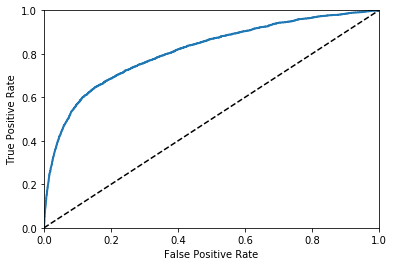

In [38]:
clf_lr_best=Pipeline((
                 ("scaler",StandardScaler()),
                 ("lr",LogisticRegression(C=10)),
                 ))
clf_lr_best.fit(x_trainup, y_trainup)

y_trainup_pred_lr= clf_lr_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_lr)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_lr))

y_test_pred_lr = clf_lr_best.predict(X_test)
C3=confusion_matrix(y_test,y_test_pred_lr)
print(C3)
print(metrics.classification_report(y_test,y_test_pred_lr))

y_scores=clf_lr_best.decision_function(X_test)
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

## SVM 

In [66]:
svm_clf=Pipeline((
                 ("scaler",StandardScaler()),
                 ("linear_svc",svm.LinearSVC(loss="hinge")),
                 ))

param_grid=[{'linear_svc__C':[1,10,100]}]
grid_search=GridSearchCV(svm_clf,param_grid,cv=3,scoring='accuracy')
grid_search.fit(x_trainup,y_trainup)

print(grid_search.best_params_)

{'linear_svc__C': 10}


[[81245 13704]
 [33697 61252]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77     94949
           1       0.82      0.65      0.72     94949

   micro avg       0.75      0.75      0.75    189898
   macro avg       0.76      0.75      0.75    189898
weighted avg       0.76      0.75      0.75    189898

[[34826  5864]
 [ 1015  1899]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     40690
           1       0.24      0.65      0.36      2914

   micro avg       0.84      0.84      0.84     43604
   macro avg       0.61      0.75      0.63     43604
weighted avg       0.92      0.84      0.87     43604

0.8339157933336965


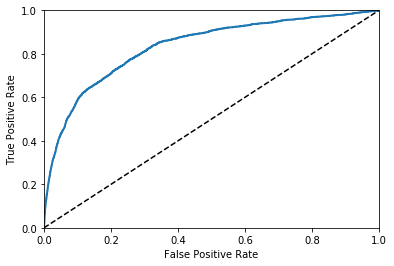

In [67]:
svm_clf_best=Pipeline((
                 ("scaler",StandardScaler()),
                 ("linear_svc",svm.LinearSVC(C=10,loss="hinge")),
                 ))
svm_clf_best.fit(x_trainup, y_trainup)

y_trainup_pred_svm= svm_clf_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_svm)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_svm))

y_test_pred_svm = svm_clf_best.predict(X_test)
C3=confusion_matrix(y_test,y_test_pred_svm)
print(C3)
print(metrics.classification_report(y_test,y_test_pred_svm))

y_scores=svm_clf_best.decision_function(X_test)
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

## 决策树

In [85]:
#CART树
clf_dt=DecisionTreeClassifier(criterion='gini', splitter='best',
                           min_samples_split=2, min_weight_fraction_leaf=0.0, 
                           max_features=None, random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
param_grid=[{'max_depth':[8,16,32],'min_samples_leaf':[1,5,10]}]
grid_search=GridSearchCV(clf_dt,param_grid,cv=3,scoring='accuracy')
grid_search.fit(x_trainup,y_trainup)

print(grid_search.best_params_)



{'max_depth': 32, 'min_samples_leaf': 1}


In [96]:
clf_dt_best=DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5,
                           min_samples_split=2, min_weight_fraction_leaf=0.0, min_samples_leaf=1,
                           max_features=None, random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
clf_dt_best.fit(x_trainup, y_trainup)
y_trainup_pred_dt = clf_dt_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_dt)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_dt))

y_test_pred_dt = clf_dt_best.predict(X_test)
C2=confusion_matrix(y_test,y_test_pred_dt)
print(C2)
print(metrics.classification_report(y_test,y_test_pred_dt))

[[72623 22326]
 [20240 74709]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     94949
           1       0.77      0.79      0.78     94949

   micro avg       0.78      0.78      0.78    189898
   macro avg       0.78      0.78      0.78    189898
weighted avg       0.78      0.78      0.78    189898

[[30972  9718]
 [  671  2243]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     40690
           1       0.19      0.77      0.30      2914

   micro avg       0.76      0.76      0.76     43604
   macro avg       0.58      0.77      0.58     43604
weighted avg       0.93      0.76      0.82     43604



0.8409361219714894


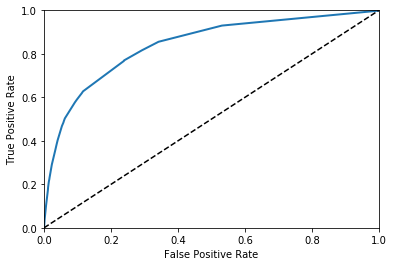

In [97]:
y_scores=clf_dt_best.predict_proba(X_test)[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [105]:
#RF
clf_rf = RandomForestClassifier() 

param_dist = {'n_estimators':range(80,200,4),'max_depth':range(2,15,1),'min_samples_leaf':range(1,9,1)} 

grid = RandomizedSearchCV(clf_rf,param_dist,cv = 3,scoring = 'accuracy',n_iter=100,n_jobs = -1) 
#在训练集上训练
grid.fit(x_trainup,y_trainup)



AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [106]:
best_estimator = grid.best_estimator_
print(best_estimator)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[[84293 10656]
 [10763 84186]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     94949
           1       0.89      0.89      0.89     94949

   micro avg       0.89      0.89      0.89    189898
   macro avg       0.89      0.89      0.89    189898
weighted avg       0.89      0.89      0.89    189898

[[35286  5404]
 [ 1105  1809]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     40690
           1       0.25      0.62      0.36      2914

   micro avg       0.85      0.85      0.85     43604
   macro avg       0.61      0.74      0.64     43604
weighted avg       0.92      0.85      0.88     43604

0.8411695734847054


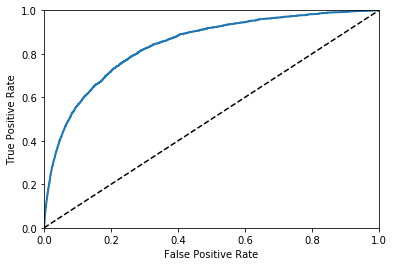

In [107]:
clf_rf_best=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf_rf_best.fit(x_trainup, y_trainup)
y_trainup_pred_dt = clf_rf_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_dt)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_dt))

y_test_pred_dt = clf_rf_best.predict(X_test)
C2=confusion_matrix(y_test,y_test_pred_dt)
print(C2)
print(metrics.classification_report(y_test,y_test_pred_dt))

y_scores=clf_rf_best.predict_proba(X_test)[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [9]:
#GBDT
clf_gbdt=GradientBoostingClassifier()
param_dist = {'n_estimators':range(50,150,4),'max_depth':range(2,15,1),'learning_rate':np.linspace(0.01,2,20),'min_samples_leaf':range(1,9,1)} 

grid = RandomizedSearchCV(clf_gbdt,param_dist,cv = 3,scoring = 'accuracy',n_iter=20,n_jobs = -1) 

grid.fit(x_trainup,y_trainup)
best_estimator = grid.best_estimator_
print(best_estimator)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.42894736842105263, loss='deviance',
              max_depth=13, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=122,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


[[94918    31]
 [    0 94949]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94949
           1       1.00      1.00      1.00     94949

   micro avg       1.00      1.00      1.00    189898
   macro avg       1.00      1.00      1.00    189898
weighted avg       1.00      1.00      1.00    189898

[[39477  1213]
 [ 2162   752]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     40690
           1       0.38      0.26      0.31      2914

   micro avg       0.92      0.92      0.92     43604
   macro avg       0.67      0.61      0.63     43604
weighted avg       0.91      0.92      0.92     43604

0.7575726153502056


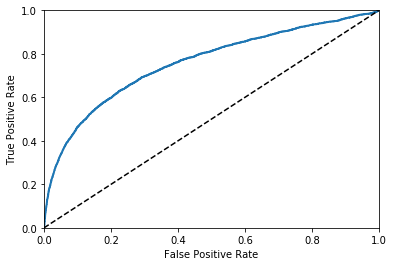

In [13]:
clf_gbdt_best=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.42894736842105263, loss='deviance',
              max_depth=13, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=122,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

clf_gbdt_best.fit(x_trainup, y_trainup)
y_trainup_pred_gbdt = clf_gbdt_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_gbdt)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_gbdt))

y_test_pred_gbdt = clf_gbdt_best.predict(X_test)
C2=confusion_matrix(y_test,y_test_pred_gbdt)
print(C2)
print(metrics.classification_report(y_test,y_test_pred_gbdt))

y_scores=clf_gbdt_best.predict_proba(X_test)[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [116]:
#XGBDT
clf_xgb = xgb.XGBClassifier() 

param_dist = {'n_estimators':range(80,200,4),'max_depth':range(2,15,1),'learning_rate':np.linspace(0.01,2,20),
              'subsample':np.linspace(0.7,0.9,20),'colsample_bytree':np.linspace(0.5,0.98,10),'min_child_weight':range(1,9,1)} 

grid = RandomizedSearchCV(clf_xgb,param_dist,cv = 3,scoring = 'neg_log_loss',n_iter=30,n_jobs = -1) 
#在训练集上训练
grid.fit(x_trainup,y_trainup)
#返回最优的训练器
best_estimator = grid.best_estimator_
print(best_estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5533333333333333, gamma=0,
       learning_rate=0.8478947368421053, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7947368421052632)


[[94903    46]
 [    0 94949]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94949
           1       1.00      1.00      1.00     94949

   micro avg       1.00      1.00      1.00    189898
   macro avg       1.00      1.00      1.00    189898
weighted avg       1.00      1.00      1.00    189898

[[39159  1531]
 [ 2119   795]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     40690
           1       0.34      0.27      0.30      2914

   micro avg       0.92      0.92      0.92     43604
   macro avg       0.65      0.62      0.63     43604
weighted avg       0.91      0.92      0.91     43604

0.7733455097576416


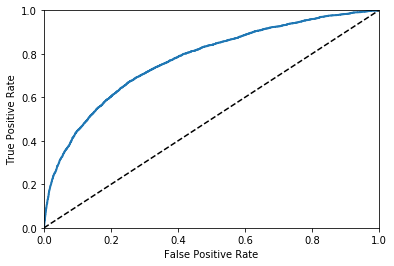

In [25]:
clf_xgb_best=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5533333333333333, gamma=0,
       learning_rate=0.8478947368421053, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7947368421052632)

clf_xgb_best.fit(x_trainup, y_trainup)
y_trainup_pred_xgb = clf_xgb_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_xgb)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_xgb))

y_test_pred_xgb = clf_xgb_best.predict(X_test.as_matrix())
C2=confusion_matrix(y_test,y_test_pred_xgb)
print(C2)
print(metrics.classification_report(y_test,y_test_pred_xgb))

y_scores=clf_xgb_best.predict_proba(X_test.as_matrix())[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [30]:
#LightGBM
import lightgbm as lgb
clf_lgb = lgb.LGBMClassifier() 

param_dist = {'n_estimators':range(80,200,4),'max_depth':range(2,15,1),'learning_rate':np.linspace(0.01,2,20)} 

grid = RandomizedSearchCV(clf_lgb,param_dist,cv = 3,scoring = 'accuracy',n_iter=30,n_jobs = -1) 
#在训练集上训练
grid.fit(x_trainup,y_trainup)
#返回最优的训练器
best_estimator = grid.best_estimator_
print(best_estimator)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.42894736842105263,
        max_depth=13, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=188, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)


[[83298 11651]
 [ 6427 88522]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     94949
           1       0.88      0.93      0.91     94949

   micro avg       0.90      0.90      0.90    189898
   macro avg       0.91      0.90      0.90    189898
weighted avg       0.91      0.90      0.90    189898

[[34701  5989]
 [ 1251  1663]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     40690
           1       0.22      0.57      0.31      2914

   micro avg       0.83      0.83      0.83     43604
   macro avg       0.59      0.71      0.61     43604
weighted avg       0.92      0.83      0.87     43604

0.7959439417812131


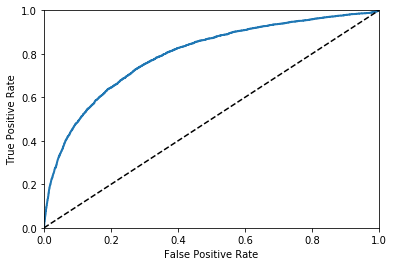

In [32]:
clf_lgb_best=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.42894736842105263,
        max_depth=13, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=188, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)
clf_lgb_best.fit(x_trainup, y_trainup)
y_trainup_pred_lgb = clf_lgb_best.predict(x_trainup)
C1=confusion_matrix(y_trainup,y_trainup_pred_lgb)
print(C1)
print(metrics.classification_report(y_trainup,y_trainup_pred_lgb))

y_test_pred_lgb = clf_lgb_best.predict(X_test.as_matrix())
C2=confusion_matrix(y_test,y_test_pred_lgb)
print(C2)
print(metrics.classification_report(y_test,y_test_pred_lgb))

y_scores=clf_lgb_best.predict_proba(X_test.as_matrix())[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

## 模型融合

In [71]:
#blending
clfs=[Pipeline((
                 ("scaler",StandardScaler()),
                 ("lr",LogisticRegression(C=10)),
                 )),
      Pipeline((
                 ("scaler",StandardScaler()),
                 ("linear_svc",svm.LinearSVC(C=10,loss="hinge")),
                 )),
      DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5,
                           min_samples_split=2, min_weight_fraction_leaf=0.0, min_samples_leaf=1,
                           max_features=None, random_state=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False),
      RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
      GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.42894736842105263, loss='deviance',
              max_depth=13, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=122,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
      XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5533333333333333, gamma=0,
       learning_rate=0.8478947368421053, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=92, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7947368421052632),
      lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.42894736842105263,
        max_depth=13, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=188, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,subsample_freq=0)]

In [51]:
print(x_trainup.shape,y_trainup.shape)

(189898, 8) (189898,)


In [52]:
x_trainblend, x_valid, y_trainblend, y_valid = train_test_split(x_trainup,y_trainup, test_size=0.5, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',x_trainblend.shape,y_trainblend.shape)  # 训练集样本大小
print('验证集大小：',x_valid.shape,y_valid.shape)  # 测试集样本大小

训练集大小： (94949, 8) (94949,)
验证集大小： (94949, 8) (94949,)


0.8127864684231327
0.8341029812940233
0.8379962336382373
0.8466220564176669
0.7929814508918143
0.7888609332190611
0.8075163746242114
[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


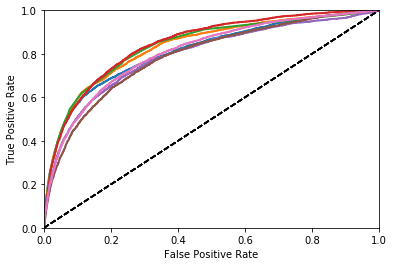

In [72]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
dataset_d1 = np.zeros((x_valid.shape[0], len(clfs)))
dataset_d2 = np.zeros((X_test.shape[0], len(clfs)))
for j, clf in enumerate(clfs):
    clf.fit(x_trainblend, y_trainblend)
    y_valid_pred=clf.predict(x_valid)
    y_test_pred=clf.predict(X_test.as_matrix())
    if j==0 or j==1:
        y_scores=clf.decision_function(X_test.as_matrix())
    else: 
        y_scores=clf.predict_proba(X_test.as_matrix())[:,1]     
    fpr,tpr,threshholds=roc_curve(y_test,y_scores)
    print(roc_auc_score(y_test,y_scores))  
    plot_roc_curve(fpr,tpr)
    dataset_d1[:,j]=y_valid_pred
    dataset_d2[:,j]=y_test_pred

print(dataset_d1)
print(dataset_d2)

In [ ]:
#vote

[[45094  2181]
 [   20 47654]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     47275
           1       0.96      1.00      0.98     47674

   micro avg       0.98      0.98      0.98     94949
   macro avg       0.98      0.98      0.98     94949
weighted avg       0.98      0.98      0.98     94949

[[38763  1927]
 [ 1831  1083]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     40690
           1       0.36      0.37      0.37      2914

   micro avg       0.91      0.91      0.91     43604
   macro avg       0.66      0.66      0.66     43604
weighted avg       0.92      0.91      0.91     43604

0.8194776852890927


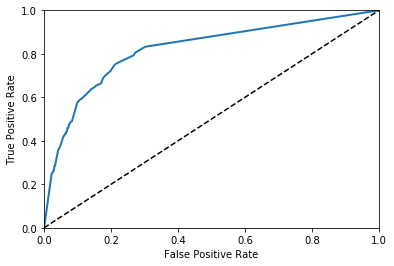

In [89]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=196, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(dataset_d1, y_valid)
y_valid_pred2 = clf.predict(dataset_d1)
C1=confusion_matrix(y_valid,y_valid_pred2)
print(C1)
print(metrics.classification_report(y_valid,y_valid_pred2))

y_submission = clf.predict(dataset_d2)
C2=confusion_matrix(y_test,y_submission)
print(C2)
print(metrics.classification_report(y_test,y_submission))

y_scores=clf.predict_proba(dataset_d2)[:,1]
      
fpr,tpr,threshholds=roc_curve(y_test,y_scores)
print(roc_auc_score(y_test,y_scores))
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()